<a href="https://colab.research.google.com/github/anaPK6/Python-Models/blob/main/GDA_Logistic_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Under certain circumstances GDA and logistcregression models give same results.i.e  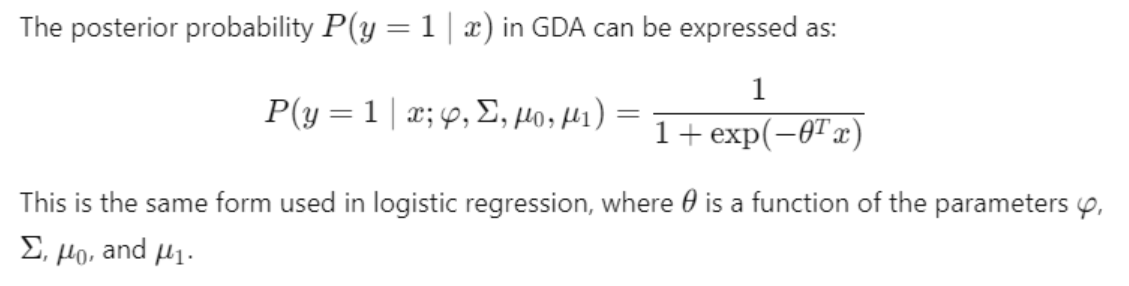

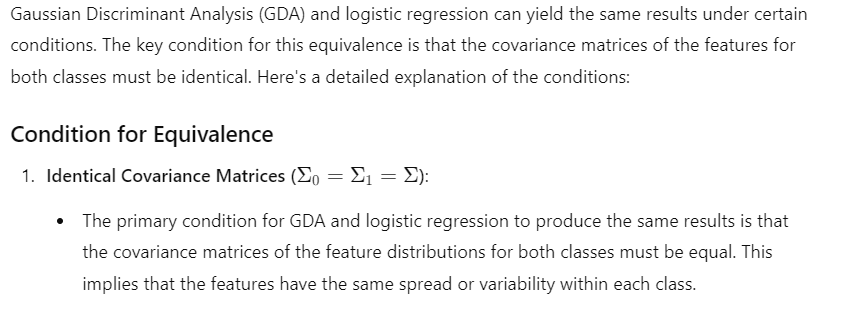

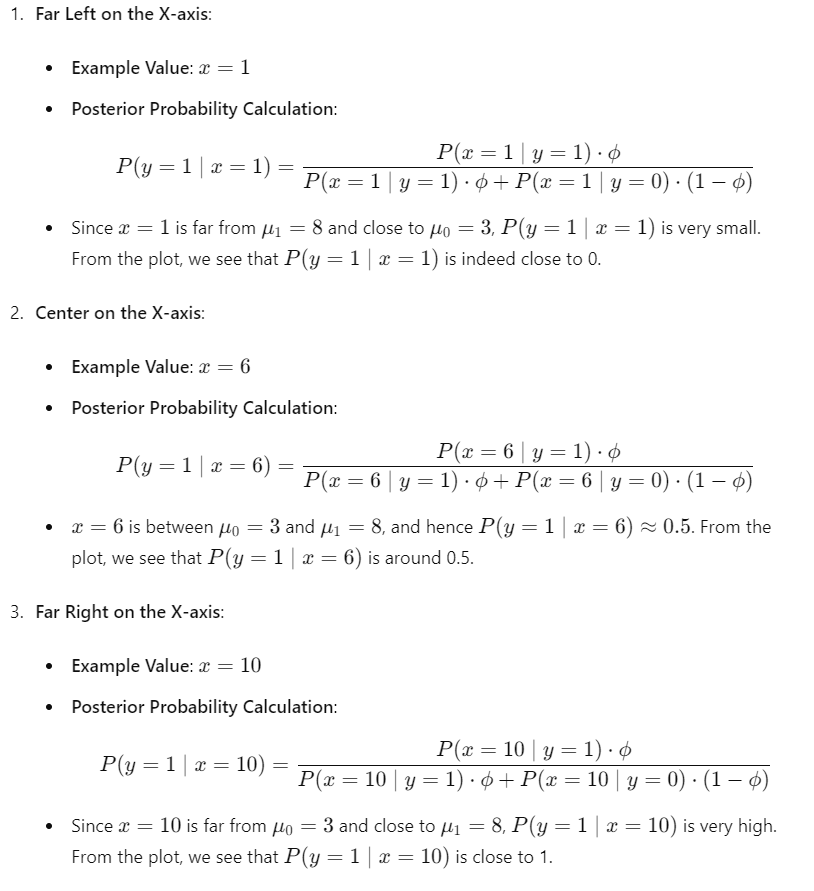

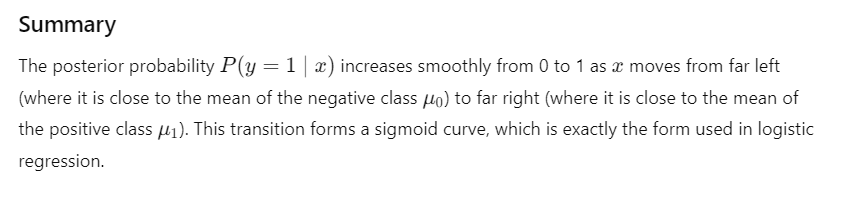

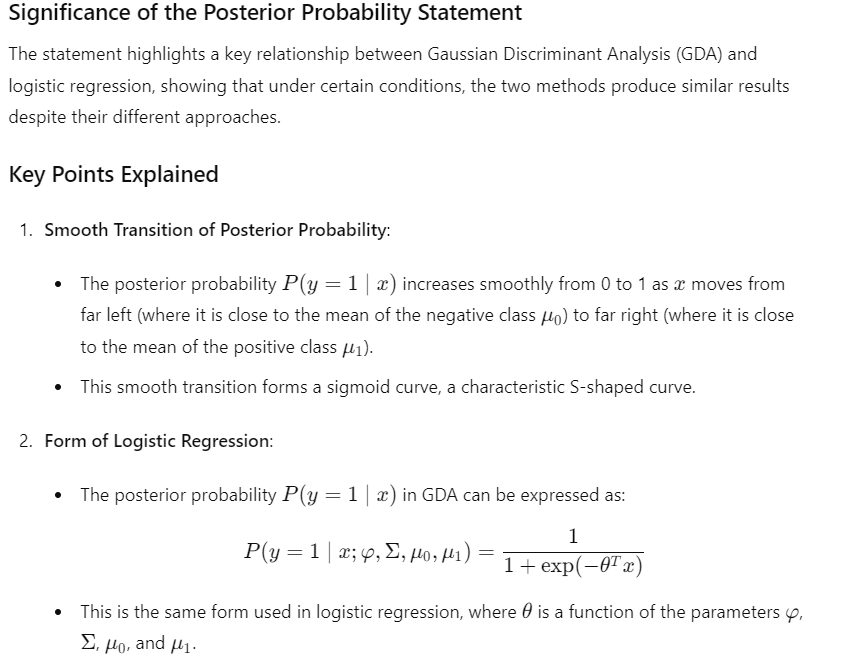

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

# Define the parameters
mu_0 = 3
mu_1 = 8
sigma = 2
phi = 0.5

# Define the Gaussian PDF
def gaussian_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma))) * np.exp(-0.5 * ((x - mu) ** 2) / sigma)

# Define the posterior probability P(y=1 | x) for GDA
def posterior_probability(x, mu_0, mu_1, sigma, phi):
    p_x_given_y1 = gaussian_pdf(x, mu_1, sigma)
    p_x_given_y0 = gaussian_pdf(x, mu_0, sigma)
    p_y1_given_x = (p_x_given_y1 * phi) / (p_x_given_y1 * phi + p_x_given_y0 * (1 - phi))
    return p_y1_given_x

# Generate dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict probabilities using logistic regression
x_values_lr = np.linspace(0, 12, 300).reshape(-1, 1)
probabilities_lr = log_reg.predict_proba(x_values_lr)[:, 1]

# Generate x values for GDA
x_values = np.linspace(0, 12, 300)
# Calculate posterior probabilities for GDA
posterior_probs = [posterior_probability(x, mu_0, mu_1, sigma, phi) for x in x_values]

# Create the plot
fig = go.Figure()

# Add the posterior probability curve for GDA
fig.add_trace(go.Scatter(x=x_values, y=posterior_probs, mode='lines', name='GDA P(y=1 | x)', line=dict(color='blue')))

# Add the probability curve for logistic regression
fig.add_trace(go.Scatter(x=x_values_lr.flatten(), y=probabilities_lr, mode='lines', name='Logistic Regression P(y=1 | x)', line=dict(color='orange', dash='dash')))

# Add vertical lines for mu_0 and mu_1
fig.add_trace(go.Scatter(x=[mu_0, mu_0], y=[0, 1], mode='lines', name='μ0', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=[mu_1, mu_1], y=[0, 1], mode='lines', name='μ1', line=dict(color='green', dash='dash')))

# Add points for specific x values
x_points = [1, 6, 10]
y_points = [posterior_probability(x, mu_0, mu_1, sigma, phi) for x in x_points]
fig.add_trace(go.Scatter(x=x_points, y=y_points, mode='markers+text', text=[f"({x}, {y:.2f})" for x, y in zip(x_points, y_points)], textposition='top center', marker=dict(color='purple', size=10)))

# Add horizontal line at y = 0.5
fig.add_trace(go.Scatter(x=[0, 12], y=[0.5, 0.5], mode='lines', name='0.5', line=dict(color='gray', dash='dash')))

# Update layout
fig.update_layout(
    title="Posterior Probability P(y=1 | x) as a Function of x",
    xaxis_title="x",
    yaxis_title="P(y=1 | x)",
    legend_title="Legend",
    showlegend=True
)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

# Define the parameters
mu_0 = 3
mu_1 = 8
sigma_same = 2
sigma_diff_0 = 2
sigma_diff_1 = 4
phi = 0.5

# Define the Gaussian PDF
def gaussian_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma))) * np.exp(-0.5 * ((x - mu) ** 2) / sigma)

# Define the posterior probability P(y=1 | x) for GDA
def posterior_probability(x, mu_0, mu_1, sigma_0, sigma_1, phi):
    p_x_given_y1 = gaussian_pdf(x, mu_1, sigma_1)
    p_x_given_y0 = gaussian_pdf(x, mu_0, sigma_0)
    p_y1_given_x = (p_x_given_y1 * phi) / (p_x_given_y1 * phi + p_x_given_y0 * (1 - phi))
    return p_y1_given_x

# Generate dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict probabilities using logistic regression
x_values_lr = np.linspace(0, 12, 300).reshape(-1, 1)
probabilities_lr = log_reg.predict_proba(x_values_lr)[:, 1]

# Generate x values for GDA
x_values = np.linspace(0, 12, 300)

# Calculate posterior probabilities for GDA with same sigma
posterior_probs_same_sigma = [posterior_probability(x, mu_0, mu_1, sigma_same, sigma_same, phi) for x in x_values]

# Calculate posterior probabilities for GDA with different sigmas
posterior_probs_diff_sigma = [posterior_probability(x, mu_0, mu_1, sigma_diff_0, sigma_diff_1, phi) for x in x_values]

# Create the plot for matching GDA and Logistic Regression (same sigma)
fig1 = go.Figure()

# Add the posterior probability curve for GDA with same sigma
fig1.add_trace(go.Scatter(x=x_values, y=posterior_probs_same_sigma, mode='lines', name='GDA (Same Σ) P(y=1 | x)', line=dict(color='blue')))

# Add the probability curve for logistic regression
fig1.add_trace(go.Scatter(x=x_values_lr.flatten(), y=probabilities_lr, mode='lines', name='Logistic Regression P(y=1 | x)', line=dict(color='orange', dash='dash')))

# Add vertical lines for mu_0 and mu_1
fig1.add_trace(go.Scatter(x=[mu_0, mu_0], y=[0, 1], mode='lines', name='μ0', line=dict(color='red', dash='dash')))
fig1.add_trace(go.Scatter(x=[mu_1, mu_1], y=[0, 1], mode='lines', name='μ1', line=dict(color='green', dash='dash')))

# Update layout
fig1.update_layout(
    title="Posterior Probability P(y=1 | x) with Matching GDA and Logistic Regression",
    xaxis_title="x",
    yaxis_title="P(y=1 | x)",
    legend_title="Legend",
    showlegend=True
)

# Create the plot for non-matching GDA and Logistic Regression (different sigmas)
fig2 = go.Figure()

# Add the posterior probability curve for GDA with different sigmas
fig2.add_trace(go.Scatter(x=x_values, y=posterior_probs_diff_sigma, mode='lines', name='GDA (Different Σ) P(y=1 | x)', line=dict(color='blue')))

# Add the probability curve for logistic regression
fig2.add_trace(go.Scatter(x=x_values_lr.flatten(), y=probabilities_lr, mode='lines', name='Logistic Regression P(y=1 | x)', line=dict(color='orange', dash='dash')))

# Add vertical lines for mu_0 and mu_1
fig2.add_trace(go.Scatter(x=[mu_0, mu_0], y=[0, 1], mode='lines', name='μ0', line=dict(color='red', dash='dash')))
fig2.add_trace(go.Scatter(x=[mu_1, mu_1], y=[0, 1], mode='lines', name='μ1', line=dict(color='green', dash='dash')))

# Update layout
fig2.update_layout(
    title="Posterior Probability P(y=1 | x) with Non-Matching GDA and Logistic Regression",
    xaxis_title="x",
    yaxis_title="P(y=1 | x)",
    legend_title="Legend",
    showlegend=True
)

# Show plots
fig1.show()
fig2.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression

# Define the parameters
mu_0 = 3
mu_1 = 8
sigma_same = 2
sigma_diff_0 = 2
sigma_diff_1 = 4
phi = 0.5

# Define the Gaussian PDF
def gaussian_pdf(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma))) * np.exp(-0.5 * ((x - mu) ** 2) / sigma)

# Define the posterior probability P(y=1 | x) for GDA
def posterior_probability(x, mu_0, mu_1, sigma_0, sigma_1, phi):
    p_x_given_y1 = gaussian_pdf(x, mu_1, sigma_1)
    p_x_given_y0 = gaussian_pdf(x, mu_0, sigma_0)
    p_y1_given_x = (p_x_given_y1 * phi) / (p_x_given_y1 * phi + p_x_given_y0 * (1 - phi))
    return p_y1_given_x

# Generate dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Predict probabilities using logistic regression
x_values_lr = np.linspace(0, 12, 300).reshape(-1, 1)
probabilities_lr = log_reg.predict_proba(x_values_lr)[:, 1]

# Generate x values for GDA
x_values = np.linspace(0, 12, 300)

# Calculate posterior probabilities for GDA with same sigma
posterior_probs_same_sigma = [posterior_probability(x, mu_0, mu_1, sigma_same, sigma_same, phi) for x in x_values]

# Calculate posterior probabilities for GDA with different sigmas
posterior_probs_diff_sigma = [posterior_probability(x, mu_0, mu_1, sigma_diff_0, sigma_diff_1, phi) for x in x_values]

# Check conditions for equivalence
condition_same_sigma = f"Condition for Equivalence (Same Covariance Matrices) Satisfied: Σ0 = Σ1 = Σ = {sigma_same}"
condition_diff_sigma = f"Condition for Equivalence (Different Covariance Matrices) Not Satisfied: Σ0 = {sigma_diff_0} ≠ Σ1 = {sigma_diff_1}"

# Create the plot for matching GDA and Logistic Regression (same sigma)
fig1 = go.Figure()

# Add the posterior probability curve for GDA with same sigma
fig1.add_trace(go.Scatter(x=x_values, y=posterior_probs_same_sigma, mode='lines', name='GDA (Same Σ) P(y=1 | x)', line=dict(color='blue')))

# Add the probability curve for logistic regression
fig1.add_trace(go.Scatter(x=x_values_lr.flatten(), y=probabilities_lr, mode='lines', name='Logistic Regression P(y=1 | x)', line=dict(color='orange', dash='dash')))

# Add vertical lines for mu_0 and mu_1
fig1.add_trace(go.Scatter(x=[mu_0, mu_0], y=[0, 1], mode='lines', name='μ0', line=dict(color='red', dash='dash')))
fig1.add_trace(go.Scatter(x=[mu_1, mu_1], y=[0, 1], mode='lines', name='μ1', line=dict(color='green', dash='dash')))

# Add condition text to the plot
fig1.add_annotation(x=0.5, y=0.9, xref="paper", yref="paper",
                    text=condition_same_sigma,
                    showarrow=False,
                    font=dict(size=14, color="black"))

# Update layout
fig1.update_layout(
    title="Posterior Probability P(y=1 | x) with Matching GDA and Logistic Regression",
    xaxis_title="x",
    yaxis_title="P(y=1 | x)",
    legend_title="Legend",
    showlegend=True
)

# Create the plot for non-matching GDA and Logistic Regression (different sigmas)
fig2 = go.Figure()

# Add the posterior probability curve for GDA with different sigmas
fig2.add_trace(go.Scatter(x=x_values, y=posterior_probs_diff_sigma, mode='lines', name='GDA (Different Σ) P(y=1 | x)', line=dict(color='blue')))

# Add the probability curve for logistic regression
fig2.add_trace(go.Scatter(x=x_values_lr.flatten(), y=probabilities_lr, mode='lines', name='Logistic Regression P(y=1 | x)', line=dict(color='orange', dash='dash')))

# Add vertical lines for mu_0 and mu_1
fig2.add_trace(go.Scatter(x=[mu_0, mu_0], y=[0, 1], mode='lines', name='μ0', line=dict(color='red', dash='dash')))
fig2.add_trace(go.Scatter(x=[mu_1, mu_1], y=[0, 1], mode='lines', name='μ1', line=dict(color='green', dash='dash')))

# Add condition text to the plot
fig2.add_annotation(x=0.5, y=0.9, xref="paper", yref="paper",
                    text=condition_diff_sigma,
                    showarrow=False,
                    font=dict(size=14, color="black"))

# Update layout
fig2.update_layout(
    title="Posterior Probability P(y=1 | x) with Non-Matching GDA and Logistic Regression",
    xaxis_title="x",
    yaxis_title="P(y=1 | x)",
    legend_title="Legend",
    showlegend=True
)

# Show plots
fig1.show()
fig2.show()
